# Numpy based Logistic Regression on Breast Cancer Data set

    - This is a custom implementation of Logistic Regression using Numpy 
    - This implements a numpy based forward and back propogation on breast cancer data set
    - Cool implementation and gives a good understanding of how to implement back propogation using chain rule.

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer

In [2]:
import random

def initialize():
    
    data = load_breast_cancer()
    X = data.data
    print ('Shape of X is ',X.shape)
    
    y = data.target
    print ('Shape of y is ', y.shape)
    
    w = np.random.random((X.shape[1],1))
    print ('Shape of w is ', w.shape)
    
    b = 0.01
    
    num_training_examples = X.shape[0]
    
    return X,y,w,b,num_training_examples

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
seed = random.seed(100)

# Initialize the data
X,y,w,b,num_training_examples = initialize()

# Split the data into train and test
trainX, testX, trainY, testY = train_test_split(X,y, random_state=seed)

Shape of X is  (569, 30)
Shape of y is  (569,)
Shape of w is  (30, 1)


# Forward Propogation

In [4]:
def fwd_propogate(trainX, weight, intercept):
    #print ('Shape of trainX is ', trainX.shape)
    #print ('Shape of weight.T is ', weight.T.shape)
    
    z = np.dot(weight.T,trainX.T)+intercept
    #print (z.shape)
    yhat = 1/(1+np.exp(-z))
    #print (weight)
    #print (yhat)
    #print (yhat.shape)
    return yhat

# Backward Propogation

In [5]:
#print ('Shape of X is ', X.shape)
#print ('Shape of dy.T is ', dy.T.shape)

alpha = 0.001
def back_propogate(trainX,trainY,yhat,weight,intercept):
    
    num_training_examples = trainX.shape[0]
    #print (num_training_examples)
    
    # Find derivative of trainY w.r.t z
    dy = yhat - trainY
    #print ('Shape of trainX is ', trainX.shape)
    #print ('Shape of dy.T is ', dy.T.shape)

    # Find derivative of z w.r.t w
    dzw = np.dot(dy, trainX)/num_training_examples
    dzw = dzw.T
    #print (dzw.shape)

    # Find derivative of z w.r.t w
    dzb = np.sum(dy)/num_training_examples
    #dzb = dzb.T
    #print (dzb)
    
    #print ('Shape of w is ',w.shape)
    #print ('Shape of dzw is ', dzw.shape)
    
    # Update w & b
    weight = weight - alpha*dzw
    intercept = intercept - alpha*dzb
    
    return weight,intercept

In [6]:
def propogate(trainX, trainY, weight, intercept, epochs=10):
    
    for i in range(0,epochs):
        yhat = fwd_propogate(trainX,weight,intercept)
        #print (yhat)
        weight,intercept = back_propogate(trainX,trainY,yhat,weight,intercept)
        #print (yhat)
    return weight,intercept

# Train the model with different epochs and then plot to see which epoch gives best accuracy

In [12]:
from sklearn.metrics import accuracy_score

train_accuracy = []
test_accuracy = []
epochs = [10,50,100,200,400,800,1600]

for i, epoc in enumerate(epochs):
    
    # Find the weights & intercept
    weights, intercept = propogate(trainX, trainY, w, b, epochs=epoc)

    predictedYOnTrainingData = np.round(fwd_propogate(trainX, weights, intercept))
    trainining_accuracy = accuracy_score(trainY, predictedYOnTrainingData[0])
    
    predictedYOnTestData = np.round(fwd_propogate(testX, weights, intercept))
    testing_accuracy = accuracy_score(testY, predictedYOnTestData[0])
    
    train_accuracy.append(trainining_accuracy)
    test_accuracy.append(testing_accuracy)
    

print ('Max accuracy is ', max(test_accuracy))

Max accuracy is  0.9300699300699301


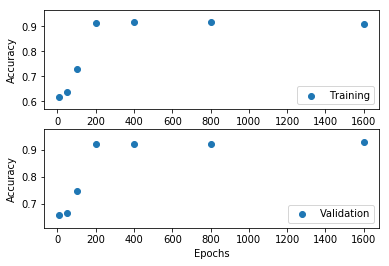

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

figure = plt.figure()

ax1 = figure.add_subplot(211)
plt.scatter(epochs, train_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(labels=['Training'])

ax1 = figure.add_subplot(212)
plt.scatter(epochs, test_accuracy)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(labels=['Validation'])

plt.show()